#Section 3
Since we learned from the previous section that a country's daily infection rate is affected by their vaccinated population and stringency, we are curious to see how each country are comparing to each other in terms of those two variables.

Based on that curiosity, we plot two choropleths (colored maps) showing

1) Percentage of vaccinated people

2) The Stringency Index of each country

And with these plots, we are able to formulate a question that can be useful in the real world.

**Question: Which countries are a good choice for investors or tourists?** i.e.

1) As a businessperson, which country should we put our money into between the USA and China? (since there are numerous choices, we will choose this scenario just for example)

2) As a tourist, which countries are a good destination during these times?

In [ ]:
! pip install plotly --upgrade

In [ ]:
! wget https://covid.ourworldindata.org/data/owid-covid-data.csv

--2021-10-13 11:12:44--  https://covid.ourworldindata.org/data/owid-covid-data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 104.21.233.137, 104.21.233.138, 2606:4700:3038::6815:e989, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|104.21.233.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘owid-covid-data.csv.13’

owid-covid-data.csv     [   <=>              ]  32.20M  56.5MB/s    in 0.6s    

2021-10-13 11:12:45 (56.5 MB/s) - ‘owid-covid-data.csv.13’ saved [33767477]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as pg
import plotly.offline as po
import plotly.express as px

#Plotting the percentage of vaccinated people in each country
* Since the data in our dataframe is updated daily, we will use groupby max to get the most recent data.

* 'people_vaccinated' is the number of people who are vaccinated at least once.

In [ ]:
#Setting up a new dataframe. We will group by ISO code to avoid a bug
nf=pd.read_csv('owid-covid-data.csv').fillna(0)
nf=nf[['iso_code','location','people_vaccinated','total_deaths','total_cases','population','stringency_index']].groupby(['iso_code','location']).max('people_vaccinated')
nf.drop(['OWID_ASI','OWID_INT','OWID_WRL','OWID_CYN'], axis=0, inplace=True)
nf.reset_index(inplace=True)

#calculate vaccinated percent
nf['vac_percent']=np.where(nf['people_vaccinated']<=nf['population'],
                               100*nf['people_vaccinated']/nf['population'],100)

In [ ]:
#Using plotly express so we can do 'color_discrete_map'

#create conditions & values for if-else statement
conditions=[
      (nf['vac_percent'] > 75) & (nf['vac_percent'] <= 100),
      (nf['vac_percent'] > 50) & (nf['vac_percent'] <= 75),
      (nf['vac_percent'] > 25) & (nf['vac_percent'] <= 50),
      (nf['vac_percent'] <= 25)]

values=['75% - 100%','50% - 75%','25% - 50%','0% - 25%']

# the 'select' function will do the if-else
nf['range']=np.select(conditions, values)

#Plotting
fig = px.choropleth(nf,
      locations='iso_code', 
      locationmode='ISO-3',
      color='range',
      color_discrete_map={'0% - 25%':'orangered',
                          '25% - 50%':'orange',
                          '50% - 75%':'yellow',
                          '75% - 100%':'yellowgreen'},
      category_orders={'range':['0% - 25%','25% - 50%','50% - 75%','75% - 100%']},
      scope='world',
      title='% Vaccinated by Country',
      width=1000
      )

fig.show()

#Plotting the stringency index of each country

- Basically comparing the strictness of each country in response to covid-19. It ranges from 0-100 (lowest to highest).

- The stringency index is calculated from 9 parameters, but in this case it is already provided in our dataset.

- This time we will group by the most recent stringency index value of each country by using 'tail' instead of max. (excluding empty cells) 

In [ ]:
#Excluding couintries with no data
sf=pd.read_csv('owid-covid-data.csv')
sf=sf[sf['stringency_index'].notna()]

#isolate relevant columns, target latest stringency index
sf=sf[['iso_code','location','stringency_index']]
sf=sf.groupby(['location']).tail(1)

In [ ]:
#Using plotly graph objects for colorscale

#ploting choropleth
data=dict(type='choropleth',
          locations=sf['location'],
          locationmode='country names',
          z=sf['stringency_index'],
          colorscale='Ylgnbu',
          # colorbar_title='Stringency Index',
          # marker_line_color='grey',
          reversescale=False
          )

layout=dict(geo={'scope':'world'},
          # autosize=False,
          title={'text':'Stringency Index by Country (Oct 2021)'},
          # margin={'l':5,'r':5,'t':50,'b':0}, 
          dragmode=False, 
          width=1000
          )

fig4 = {'data':data, 'layout':layout}
po.iplot(fig4)

#Conclusion
*Recall the questions:*

1) As a businessperson, which country should we put our money into between the USA and China? (since there are numerous choices, we will choose this scenario just for example)

2) As a tourist, which countries are a good destination during these times?

<br>

To answer these questinos, let's look at our two plots together. 


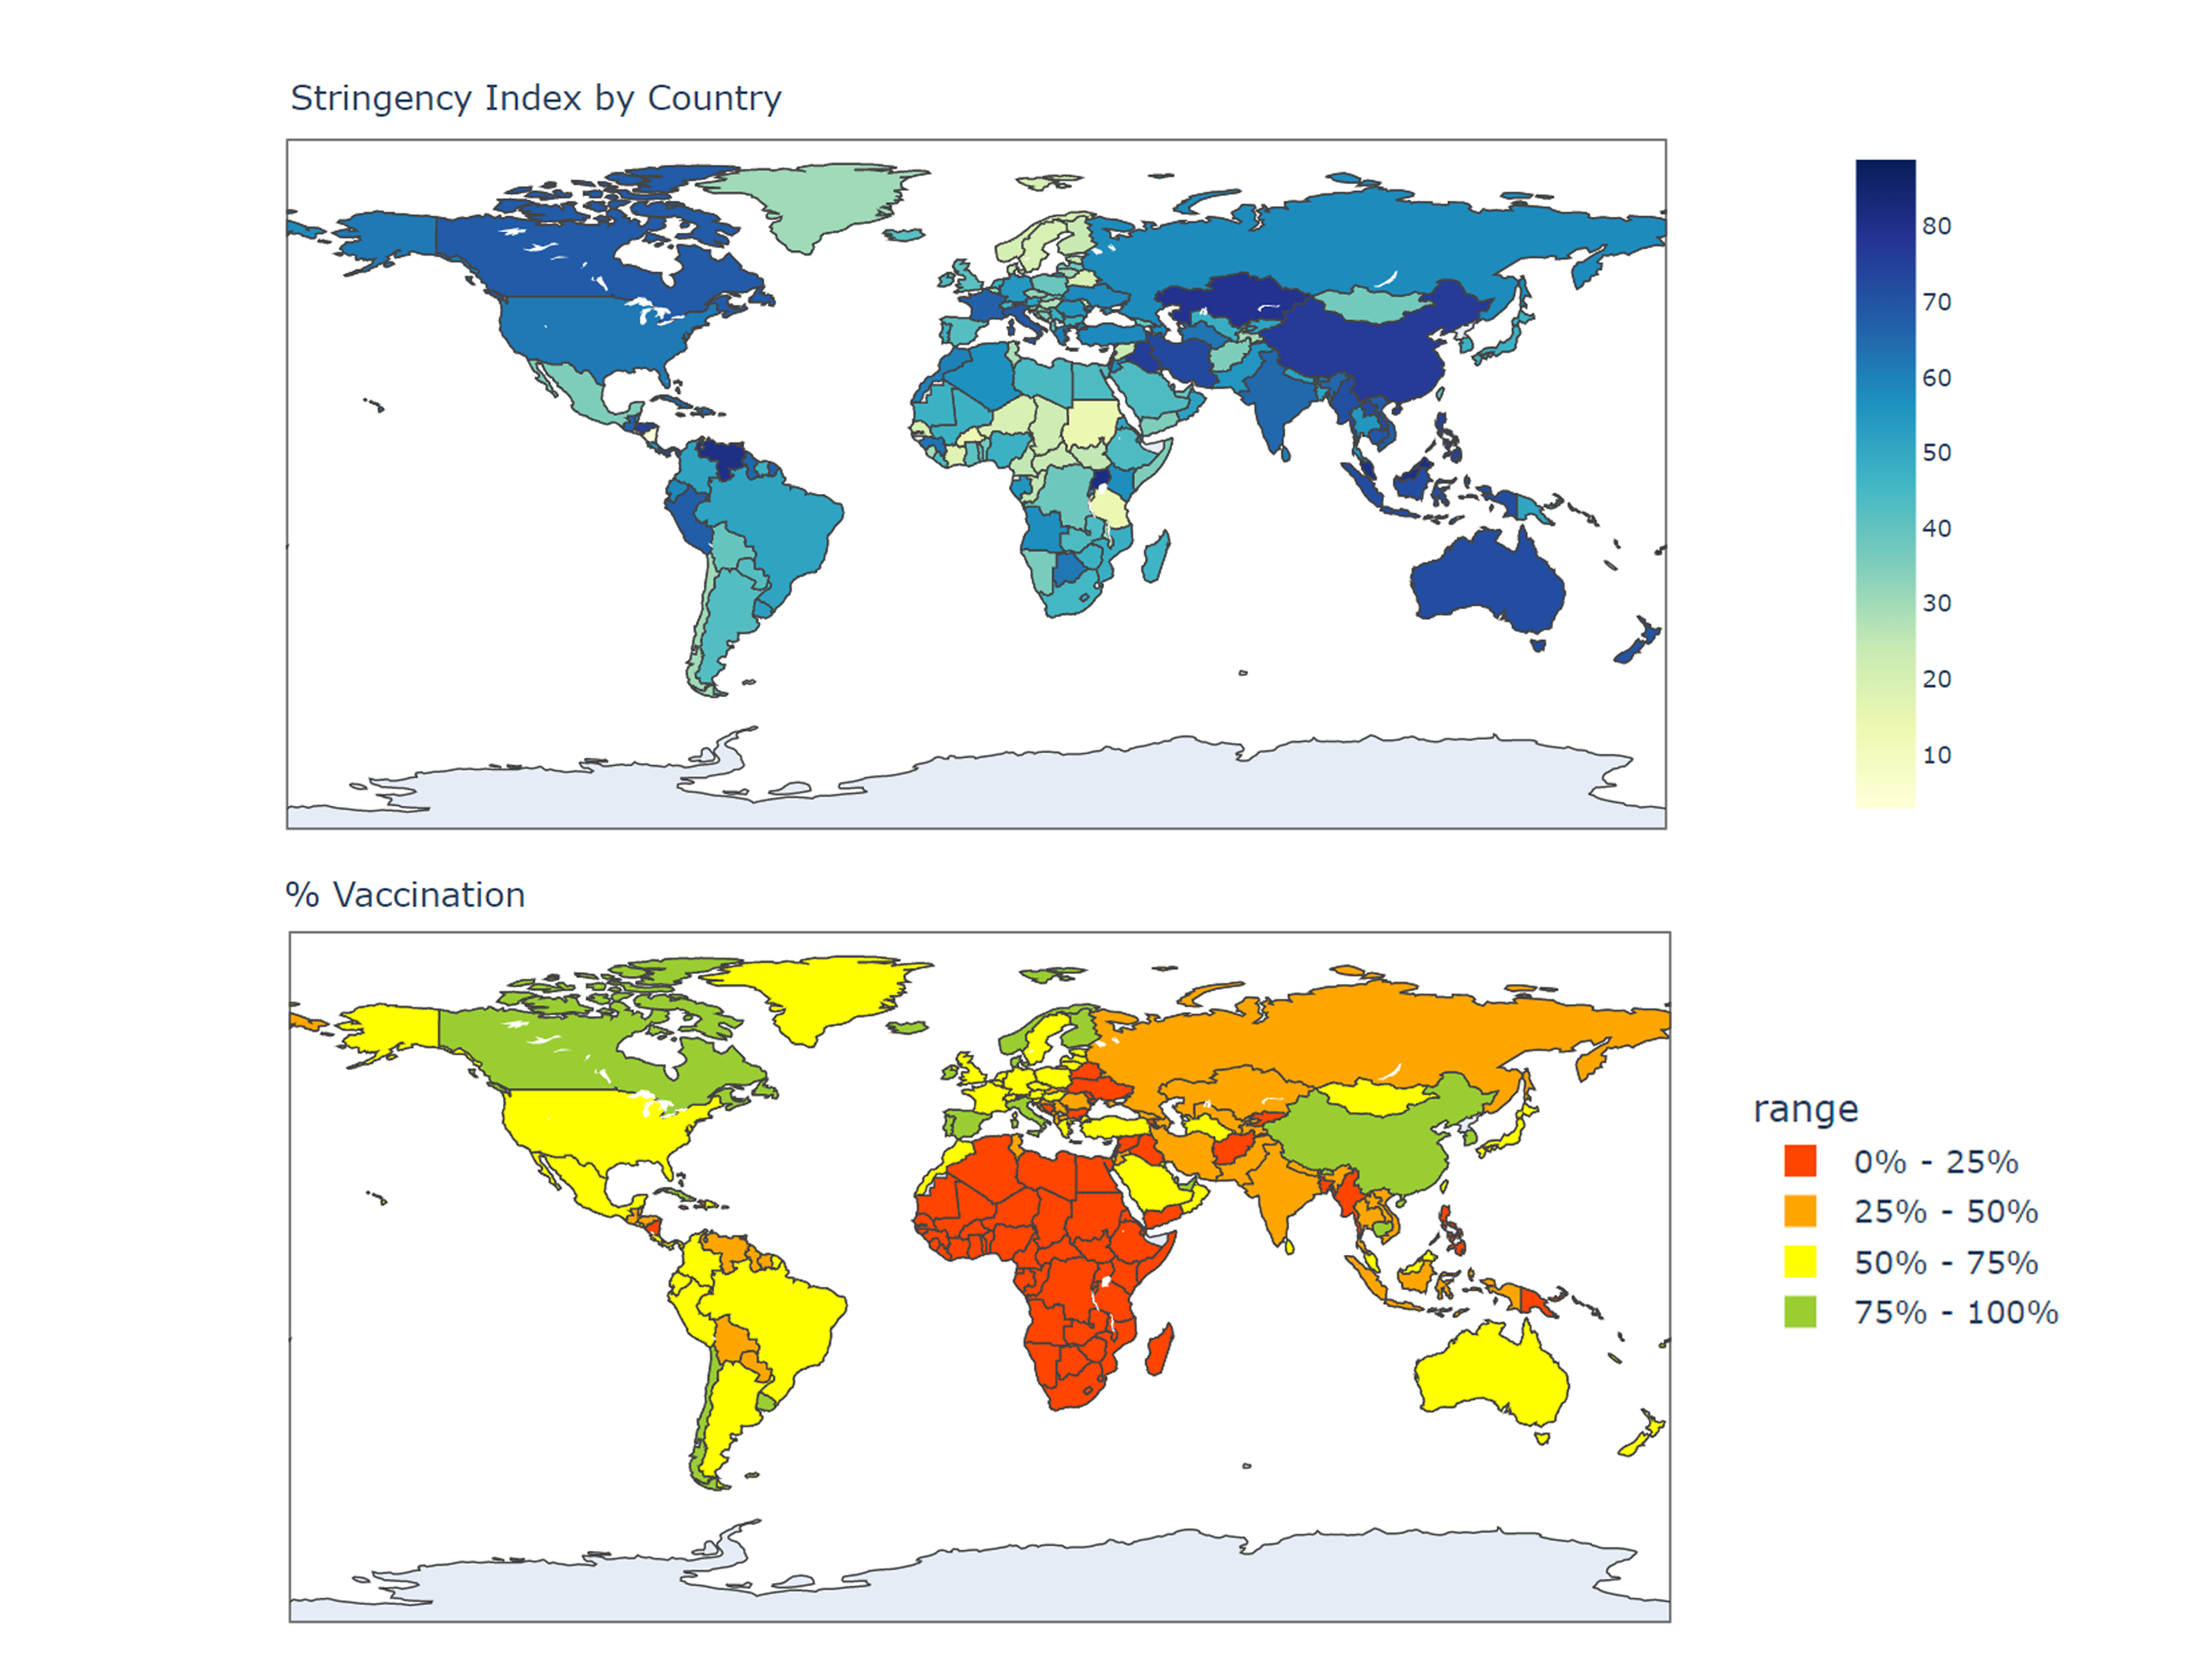



---


- As a business person, we might first see that around half to three quarters of the USA are vaccinated (about 65% to be precise) while their stringency are at about 60 out of 100.

- On the other hand, China, despite having nearly all their population vaccinated (79.9%), is still stricter than the USA with a stringency index of 76. Based on this finding, we can see that the USA's daily infection rate is more likely to increase, and so China is a safer choice for investment.

---
- As tourists, we begin by checking the vaccination percentage. The green countries on the plot could all be safe areas to travel to. However, if the country is also very stringent, many tourists destinatios might be unavailable and the trip will be less fun. (Assuming we are even allowed to go there.) 

- So, we will choose the countries that are mostly vaccinated but also less strict. We can see that the Scandinavian countries, Spain, Portugal, Iceland, South Korea, and the UAE fit into thoses categories and could be a good choice.

Of course, if we are real businesspersons or are really planning a trip abroad, there will be many more factors we have to consider. But these plots could serve as a good starting point since they show a basic idea of how each country compares.